In [22]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from  torchvision import datasets , transforms

In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
])
training_dataset = datasets.MNIST(root='./data',
                                  train=True,
                                  download=True,
                                  transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,
                                              batch_size=32,
                                              shuffle=True)

validation_dataset = datasets.MNIST(root='./data',
                                    train=False,
                                    download=True,
                                    transform=transform)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                                batch_size=32,
                                                shuffle=False)

In [24]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    image = image.clip(0,1)
    return image

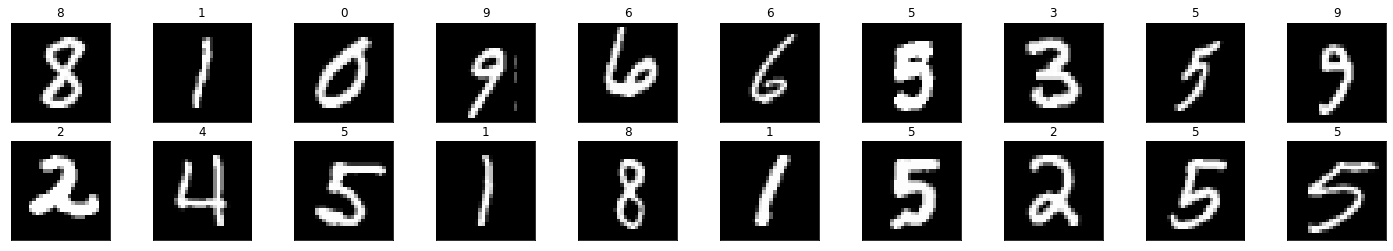

In [50]:
dataiter = iter(training_loader)
images , labels = dataiter.next()
imgage = images.to('cpu')
labels = labels.to('cpu')
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
    ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(im_convert(images[i]))
    ax.set_title(labels[i].item())

In [44]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,
                               out_channels=20,
                               kernel_size=5,
                               stride=1)
        self.conv2 = nn.Conv2d(in_channels=20,
                               out_channels=50,
                               kernel_size=5,
                               stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [45]:
torch.manual_seed(2)
model = LeNet().to('cpu')
print(model)

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [47]:
epochs = 20
running_loss_history = []
running_correct_history = []

val_running_loss_history = []
val_running_correct_history = []
for i in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader:
        inputs = inputs.to('cpu')
        labels = labels.to('cpu')
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
        running_loss += loss.item()
    else:
        with torch.no_grad():
            for val_inputs , val_labels in validation_loader:
                val_inputs = val_inputs.to('cpu')
                val_labels = val_labels.to('cpu')
#                 val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                val_running_loss += val_loss.item()
            
        epoch_loss = running_loss / len(training_loader)
        epoch_accuracy = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_correct_history.append(epoch_accuracy)
        print('Training Loss: {:.4f} {:.4f}'.format(epoch_loss,
                                                    epoch_accuracy.item()))
        
        val_epoch_loss = running_loss / len(validation_loader)
        val_epoch_accuracy = val_running_corrects.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_correct_history.append(val_epoch_accuracy)
        print('Validation Loss: {:.4f} {:.4f}'.format(val_epoch_loss,
                                                    val_epoch_accuracy.item()))

Training Loss: 0.3578 28.7285
Validation Loss: 2.1436 30.8946
Training Loss: 0.0983 31.0469
Validation Loss: 0.5888 31.2843
Training Loss: 0.0694 31.3435
Validation Loss: 0.4157 31.4185
Training Loss: 0.0547 31.4597
Validation Loss: 0.3279 31.4952
Training Loss: 0.0466 31.5595
Validation Loss: 0.2792 31.4856
Training Loss: 0.0389 31.6229
Validation Loss: 0.2331 31.4856
Training Loss: 0.0341 31.6629
Validation Loss: 0.2043 31.5048
Training Loss: 0.0308 31.6965
Validation Loss: 0.1845 31.6230
Training Loss: 0.0275 31.7243
Validation Loss: 0.1645 31.6422
Training Loss: 0.0246 31.7563
Validation Loss: 0.1474 31.6294
Training Loss: 0.0210 31.7819
Validation Loss: 0.1257 31.6038
Training Loss: 0.0197 31.7941
Validation Loss: 0.1181 31.6230
Training Loss: 0.0183 31.8155
Validation Loss: 0.1098 31.6230
Training Loss: 0.0169 31.8315
Validation Loss: 0.1015 31.6326
Training Loss: 0.0145 31.8512
Validation Loss: 0.0871 31.6773
Training Loss: 0.0137 31.8581
Validation Loss: 0.0821 31.6390
Training

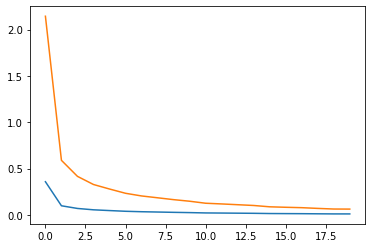

In [48]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')

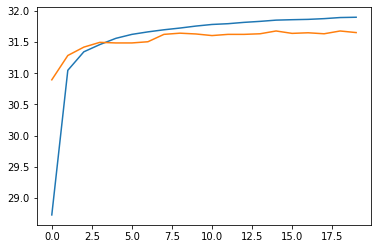

In [49]:
plt.plot(running_correct_history, label='training accuracy')
plt.plot(val_running_correct_history, label='validation accuracy')